In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"D:\zepto grocery sales analysis\zepto_grocery_20000.csv")

In [6]:
df

,order_id,order_date,customer_id,city,pincode,item_name,category,quantity,unit_price,discount_pct,promo_code,payment_method,order_channel,delivery_time_mins,delivery_status,rider_id,customer_rating,gross_value,discount_amount,order_value
0,ZP1000000,24-10-2024 02:52,C15238,Delhi,110001,Apple 1kg,Fruits & Vegetables,1,150,10,NEWUSER,COD,App,31,Delivered,R1242,4.0,150,15.0,135.0
1,ZP1000001,25-05-2025 02:21,C10912,Ahmedabad,380001,Butter 200g,Dairy,1,180,20,FEST50,UPI,App,17,Delivered,R1222,5.0,180,36.0,144.0
2,ZP1000002,05-08-2025 17:34,C10204,Kolkata,700001,Soft Drink 1L,Beverages,1,60,0,NONE,Wallet,App,31,Delivered,R1335,5.0,60,0.0,60.0
3,ZP1000003,19-04-2025 05:45,C16074,Hyderabad,500001,Apple 1kg,Fruits & Vegetables,1,150,0,NONE,COD,App,58,Delivered,R1132,4.0,150,0.0,150.0
4,ZP1000004,26-07-2025 19:38,C12253,Mumbai,400001,Chocolate Bar 50g,Snacks,1,50,0,NONE,COD,App,15,Delivered,R1126,5.0,50,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ZP1019995,17-11-2024 11:10,C12382,Pune,411001,Potato 1kg,Fruits & Vegetables,4,35,0,NONE,Debit Card,App,18,Delivered,R1022,4.0,140,0.0,140.0
19996,ZP1019996,15-07-2025 13:14,C17621,Mumbai,400001,Tomato 1kg,Fruits & Vegetables,1,30,0,NONE,Debit Card,App,51,Returned,R1116,NaN,30,0.0,30.0
19997,ZP1019997,14-07-2025 04:52,C11229,Bengaluru,560001,Butter 200g,Dairy,1,180,0,NONE,Debit Card,App,18,Delivered,R1316,5.0,180,0.0,180.0
19998,ZP1019998,30-07-2025 19:33,C17470,Delhi,110001,Coffee 100g,Beverages,1,180,0,NONE,UPI,App,35,Returned,R1101,NaN,180,0.0,180.0


In [8]:
df.describe()

,pincode,quantity,unit_price,discount_pct,delivery_time_mins,customer_rating,gross_value,discount_amount,order_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,17558.000000,20000.000000,20000.000000,20000.000000
mean,446450.800000,1.460200,122.494500,3.480000,29.789050,3.991172,178.919750,6.201800,172.717950
std,171925.603971,0.804704,100.601583,6.332385,11.427799,0.819594,194.716531,17.992114,188.712769
min,110001.000000,1.000000,25.000000,0.000000,10.000000,3.000000,25.000000,0.000000,20.000000
25%,400001.000000,1.000000,50.000000,0.000000,22.000000,3.000000,60.000000,0.000000,60.000000
50%,411001.000000,1.000000,90.000000,0.000000,30.000000,4.000000,120.000000,0.000000,120.000000
75%,560001.000000,2.000000,180.000000,5.000000,38.000000,5.000000,200.000000,3.500000,200.000000
max,700001.000000,4.000000,450.000000,20.000000,80.000000,5.000000,1800.000000,360.000000,1800.000000


In [10]:
df.isnull().sum()

order_id                 0
order_date               0
customer_id              0
city                     0
pincode                  0
item_name                0
category                 0
quantity                 0
unit_price               0
discount_pct             0
promo_code               0
payment_method           0
order_channel            0
delivery_time_mins       0
delivery_status          0
rider_id                 0
customer_rating       2442
gross_value              0
discount_amount          0
order_value              0
dtype: int64

In [18]:
df = df.fillna(0)

In [20]:
df.isnull().sum()

order_id              0
order_date            0
customer_id           0
city                  0
pincode               0
item_name             0
category              0
quantity              0
unit_price            0
discount_pct          0
promo_code            0
payment_method        0
order_channel         0
delivery_time_mins    0
delivery_status       0
rider_id              0
customer_rating       0
gross_value           0
discount_amount       0
order_value           0
dtype: int64

In [136]:
# 1. Sales & Revenue Insights
# Total revenue by city

most_revenue_by_city=df.groupby('city') ['order_value'].sum().sort_values(ascending=False)

In [138]:
most_revenue_by_city.head(1)

city
Mumbai    628017.5
Name: order_value, dtype: float64

In [144]:
# Revenue by category
most_revenue_by_item_name=df.groupby('item_name') ['order_value'].sum().sort_values(ascending=False)

In [146]:
most_revenue_by_item_name.head(1)

item_name
Rice 5kg    579487.5
Name: order_value, dtype: float64

In [148]:
# Top 10 best-selling items
most_revenue_by_category=df.groupby('category') ['order_value'].sum().sort_values(ascending=False)

In [150]:
most_revenue_by_category.head(1)

category
Staples    1026441.0
Name: order_value, dtype: float64

In [162]:
# 2. Customer & Order Behavior
# Most used payment method
df['payment_method'].value_counts(normalize=True) * 100

payment_method
UPI            49.845
Credit Card    15.190
Debit Card     14.980
COD            11.960
Wallet          8.025
Name: proportion, dtype: float64

In [168]:
# Most used order channel
df['order_channel'].value_counts()

order_channel
App        18026
Website     1974
Name: count, dtype: int64

In [170]:
# Average order value per customer
df.groupby('customer_id')['order_value'].mean()

customer_id
C10000    213.333333
C10001    103.333333
C10002    114.000000
C10003    150.000000
C10004    215.000000
             ...    
C17996    315.000000
C17997    289.125000
C17998     60.000000
C17999    170.000000
C18000     75.000000
Name: order_value, Length: 7303, dtype: float64

In [172]:
# 3. Delivery & Operations
# Average delivery time per city
df.groupby('city') ['delivery_time_mins'].mean()

city
Ahmedabad    30.063725
Bengaluru    29.469420
Chennai      29.496228
Delhi        29.642223
Hyderabad    29.724406
Kolkata      30.010698
Mumbai       30.168240
Pune         29.851984
Name: delivery_time_mins, dtype: float64

In [174]:
# Orders delayed or not delivered on time
df['delivery_status'].value_counts()

delivery_status
Delivered    17558
Returned      1024
Delayed        801
Cancelled      617
Name: count, dtype: int64

In [176]:
# Relationship between delivery time & rating
df[['delivery_time_mins', 'customer_rating']].corr()

,delivery_time_mins,customer_rating
delivery_time_mins,1.000000,0.011497
customer_rating,0.011497,1.000000


In [178]:
# 4. Discounts & Promotions
# Average discount by category
df.groupby('category')['discount_pct'].mean()

category
Beverages              3.441998
Dairy                  3.525621
Frozen                 3.422379
Fruits & Vegetables    3.497301
Household              3.432997
Personal Care          3.634628
Snacks                 3.419726
Staples                3.456911
Name: discount_pct, dtype: float64

In [180]:
# Total revenue vs discounted amount
df[['gross_value', 'discount_amount', 'order_value']].sum()

gross_value        3578395.0
discount_amount     124036.0
order_value        3454359.0
dtype: float64

In [182]:
# 5. Customer Experience
# Average customer rating per city
df.groupby('city')['customer_rating'].mean().sort_values(ascending=False)

city
Kolkata      3.536424
Mumbai       3.530816
Pune         3.521363
Hyderabad    3.504505
Bengaluru    3.501261
Delhi        3.486024
Ahmedabad    3.478992
Chennai      3.462280
Name: customer_rating, dtype: float64

In [184]:
# Correlation: price, discount, and rating
df[['unit_price', 'discount_pct', 'customer_rating']].corr()

,unit_price,discount_pct,customer_rating
unit_price,1.000000,-0.007666,0.006623
discount_pct,-0.007666,1.000000,-0.008247
customer_rating,0.006623,-0.008247,1.000000


In [186]:
# Total revenue by city
revenue_by_city = df.groupby('city')['order_value'].sum().sort_values(ascending=False)
print("\nTop 10 Cities by Revenue:\n", revenue_by_city.head(10))


Top 10 Cities by Revenue:
 city
Mumbai       628017.50
Bengaluru    551377.25
Delhi        512226.75
Hyderabad    417533.25
Chennai      416903.00
Pune         336334.00
Kolkata      333248.25
Ahmedabad    258719.00
Name: order_value, dtype: float64


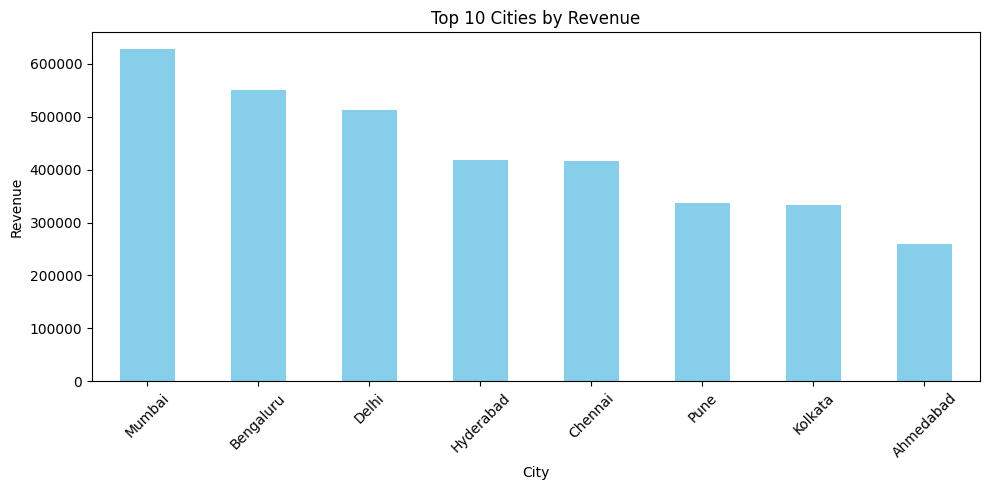

In [188]:
# Visualization
plt.figure(figsize=(10,5))
revenue_by_city.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities by Revenue")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


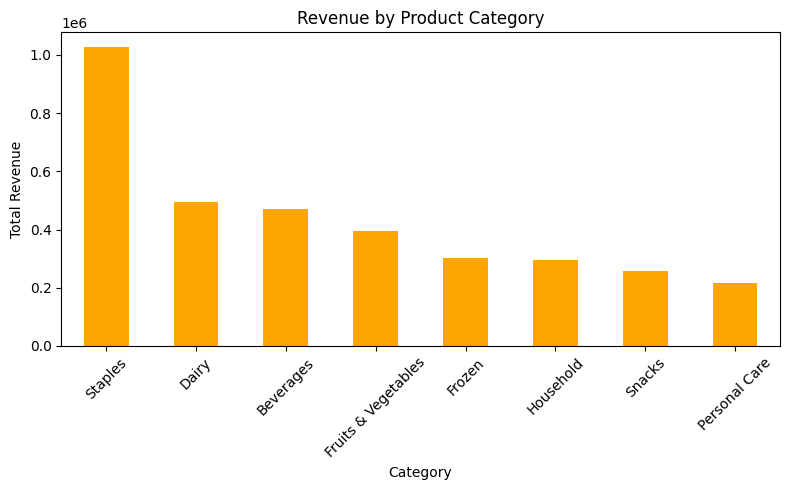

In [189]:
# Revenue by category
revenue_by_category = df.groupby('category')['order_value'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
revenue_by_category.plot(kind='bar', color='orange')
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


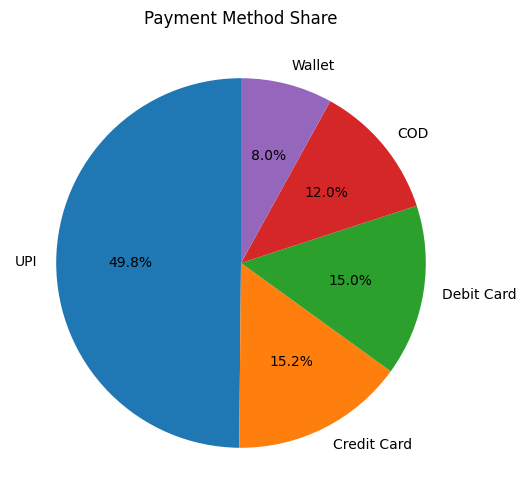

In [211]:
# 3️ CUSTOMER BEHAVIOR
# Payment method usage
payment_share = df['payment_method'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_share, labels=payment_share.index, autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Share")
plt.show()


C:\Users\91852\AppData\Local\Temp\ipykernel_28184\2482676929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='order_channel', palette='viridis')


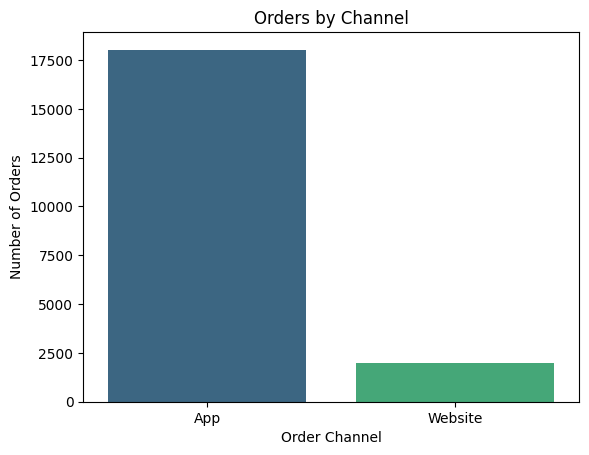

In [213]:
# Order channel usage
sns.countplot(data=df, x='order_channel', palette='viridis')
plt.title("Orders by Channel")
plt.xlabel("Order Channel")
plt.ylabel("Number of Orders")
plt.show()

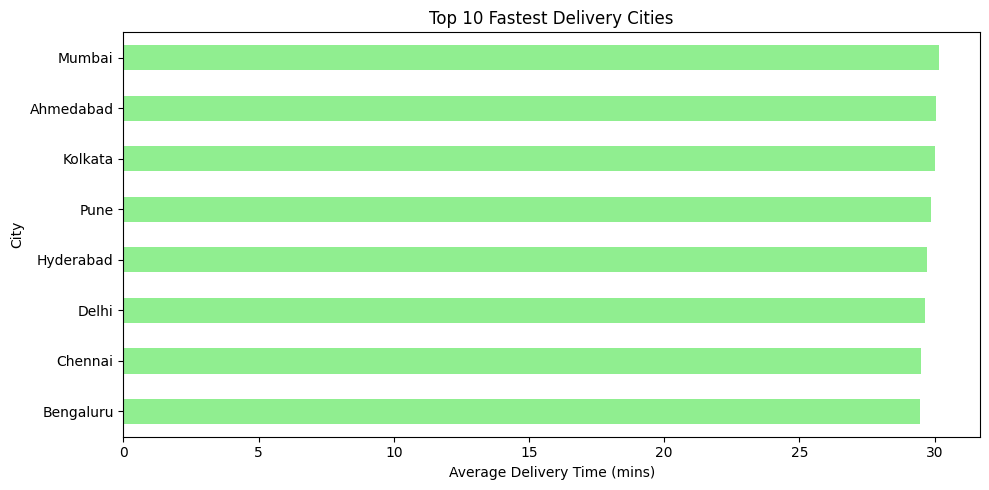

In [215]:
# 4️ DELIVERY PERFORMANCE
# Average delivery time by city
avg_delivery = df.groupby('city')['delivery_time_mins'].mean().sort_values()
plt.figure(figsize=(10,5))
avg_delivery.head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Fastest Delivery Cities")
plt.xlabel("Average Delivery Time (mins)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

C:\Users\91852\AppData\Local\Temp\ipykernel_28184\1679888434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_status.index, y=delivery_status.values, palette='pastel')


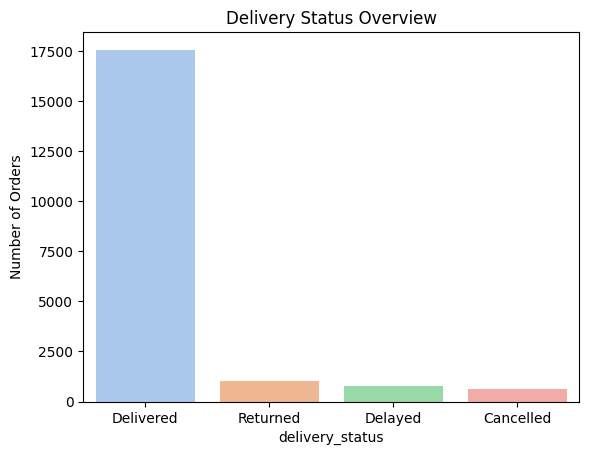

In [217]:
# Delivery status breakdown
delivery_status = df['delivery_status'].value_counts()
sns.barplot(x=delivery_status.index, y=delivery_status.values, palette='pastel')
plt.title("Delivery Status Overview")
plt.ylabel("Number of Orders")
plt.show()

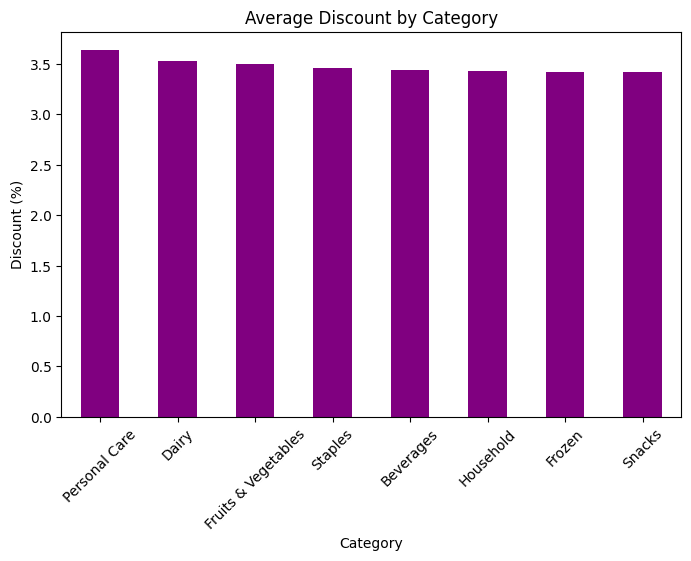

In [219]:
# 5️⃣ DISCOUNT & PROMOTION ANALYSIS
# Avg discount by category
avg_discount = df.groupby('category')['discount_pct'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
avg_discount.plot(kind='bar', color='purple')
plt.title("Average Discount by Category")
plt.ylabel("Discount (%)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

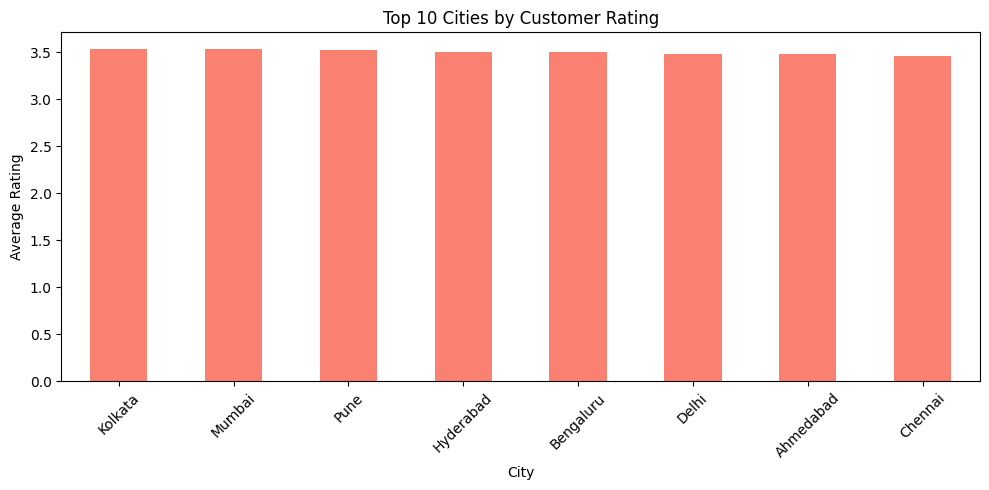

In [221]:
# 6️ CUSTOMER EXPERIENCE
# Average customer rating by city
avg_rating = df.groupby('city')['customer_rating'].mean().sort_values(ascending=False).dropna()
plt.figure(figsize=(10,5))
avg_rating.head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Cities by Customer Rating")
plt.ylabel("Average Rating")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

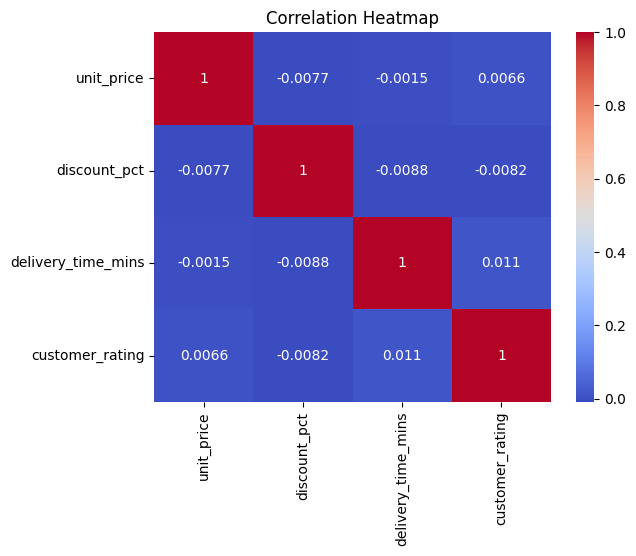

In [223]:
# Correlation heatmap
sns.heatmap(df[['unit_price', 'discount_pct', 'delivery_time_mins', 'customer_rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [225]:
# 7️ KEY INSIGHTS SUMMARY
print("\n🔹 Key Business Insights 🔹")
print("- Top revenue cities:", list(revenue_by_city.head(3).index))
print("- Best performing categories:", list(revenue_by_category.head(3).index))
print("- Fastest delivery city:", avg_delivery.index[0])
print("- Most used payment method:", payment_share.index[0])
print("- Highest rated city:", avg_rating.index[0])


🔹 Key Business Insights 🔹
- Top revenue cities: ['Mumbai', 'Bengaluru', 'Delhi']
- Best performing categories: ['Staples', 'Dairy', 'Beverages']
- Fastest delivery city: Bengaluru
- Most used payment method: UPI
- Highest rated city: Kolkata
